# Puerto Vallarta, Jalisco

##### Meta
Mejorar el mapa en [PyLatAm.org](https://pylatam.org)

##### Contexto
Este es el mapa actual:

![mapa de mexico pylatam](../figures/mapa_original.png)

In [1]:
import geopandas as gpd
from pathlib import Path
from zipfile import ZipFile
import altair as alt
import json
from useful_funcs import tree

In [2]:
raw_data_path = Path("../data/raw/")
interim_data_path = Path("../data/interim/")

In [3]:
compressed_file = ZipFile(raw_data_path/'mexstates.zip')

compressed_file.extractall(interim_data_path)

tree(interim_data_path)

+ ..\data\interim
    + mexstates.dbf
    + mexstates.prj
    + mexstates.sbn
    + mexstates.sbx
    + mexstates.shp
    + mexstates.shp.xml
    + mexstates.shx


In [4]:
shape_file = gpd.read_file(interim_data_path/'mexstates.shp')

shape_file.head()

OBJECTID FIPS_ADMIN GMI_ADMIN  ADMIN_NAME FIPS_CNTRY GMI_CNTRY CNTRY_NAME  \
0       888       MX06   MEX-CHH   Chihuahua         MX       MEX     Mexico   
1       933       MX07   MEX-CDZ    Coahuila         MX       MEX     Mexico   
2       976       MX19   MEX-NLE  Nuevo Leon         MX       MEX     Mexico   
3       978       MX28   MEX-TML  Tamaulipas         MX       MEX     Mexico   
4       998       MX25   MEX-SIN     Sinaloa         MX       MEX     Mexico   

   POP_ADMIN TYPE_ENG TYPE_LOC       SQKM      SQMI COLOR_MAP  Shape_Leng  \
0    2656214    State   Estado  247935.02  95727.70        12   22.609277   
1    2145539    State   Estado  150843.95  58240.87         2   18.993090   
2    3370912    State   Estado   65173.05  25163.31         3   15.426171   
3    2272724    State   Estado   79502.24  30695.81        11   18.023144   
4    2397706    State   Estado   57638.85  22254.36         5   16.466051   

   Shape_Area                                           geometry  
0   22.890985  POLYGON ((-103.63085937506 26.66107940648959, ...  
1   13.733655  POLYGON ((-102.6669464107481 25.0758323669703,...  
2    5.844668  POLYGON ((-99.71389770501492 27.66893768322768...  
3    7.056563  POLYGON ((-98.616088867607 22.41849136378556, ...  
4    5.145524  POLYGON ((-108.3941802981821 25.14110946612914...

In [5]:
subset = shape_file[['ADMIN_NAME', 'geometry']]
_jalisco = shape_file[shape_file['ADMIN_NAME'] == 'Jalisco'][['ADMIN_NAME', 'geometry']]

In [6]:
_data = json.loads(shape_file.to_json()) # Esta es la misma línea que utilizamos para salvar nuestros archivos en GeoJSON 

estados = alt.Data(values = _data['features'])

In [7]:
_data_jalisco = json.loads(_jalisco.to_json()) # Esta es la misma línea que utilizamos para salvar nuestros archivos en GeoJSON 

jalisco = alt.Data(values = _data_jalisco['features'])

In [8]:
# Colores
dorado = '#E6B520' #main
aqua = '#16B0BE' #secondary
naranja = '#D48336' #detail
azul = '#357BAF' #background
fuente = '#193B54'

rojo = '#BA4646'

In [9]:
base = alt.Chart(estados).mark_geoshape(stroke = fuente, fill = aqua, strokeWidth = 0.5).properties(height = 330, width = 551) 

In [10]:
jalisco = alt.Chart(jalisco).mark_geoshape(stroke = naranja, fill = dorado, strokeWidth=2)

In [11]:

puerto_vallarta = {
    "latitude": [20.6534],
    "longitude": [-105.2253],
    'shape': ['icono'],
    'color': ['icono'],
    'latitude_for_symbol': [22.05],
    'longitude_for_symbol': [-106.0253],
}

puerto_vallarta_df = gpd.pd.DataFrame(puerto_vallarta)

puerto_vallarta_df.head()

latitude  longitude  shape  color  latitude_for_symbol  \
0   20.6534  -105.2253  icono  icono                22.05   

   longitude_for_symbol  
0             -106.0253

In [12]:
icono = "M32 2a20 20 0 0 0-20 20c0 18 20 40 20 40s20-22 20-40A20 20 0 0 0 32 2z"


domains = ['icono']

shape_scale = alt.Scale(
    domain=domains,
    range=[icono,]
)

color_scale = alt.Scale(
    domain=domains,
    range=[rojo,]
)


In [13]:
punto_puerto_vallarta = alt.Chart(puerto_vallarta_df).mark_point(filled=True,).encode(
    alt.Longitude('longitude_for_symbol:Q',),
    alt.Latitude('latitude_for_symbol:Q',),
    alt.Shape('shape:N', legend=None, scale = shape_scale),
    alt.Color('color:N', legend=None, scale = color_scale),
    alt.OpacityValue(1),
    alt.SizeValue(.6)
)


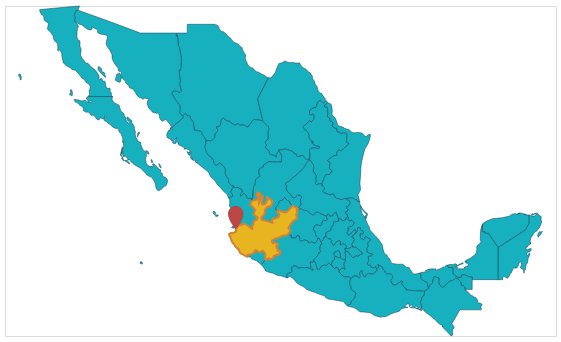

In [14]:
base + jalisco + punto_puerto_vallarta